Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [205]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [206]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')

movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [207]:
# code here
movies_df = movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [208]:
# code here

movies_df.drop_duplicates(keep = 'first')

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [209]:
# Code here

movies_df.drop(movies_df[movies_df['budget'] == 0].index, inplace=True)
movies_df.drop(movies_df[movies_df['revenue'] == 0].index, inplace=True)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [210]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format= '%Y-%m-%d')

# Extract the release year from every release date
movies_df['release_year'] = pd.DatetimeIndex(movies_df['release_date']).year
movies_df.release_year

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_year, Length: 3229, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [211]:
# code here
movies_df['budget'] = movies_df['budget'].apply(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [212]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [213]:
# Code here
movies_df.sort_values('budget', ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [214]:
# code here
movies_df['profit'] = movies_df.revenue - movies_df.budget

movies_df.sort_values('profit', ascending=False).head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [215]:
# Code here
movies_df.sort_values('popularity', ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7



In [216]:
# Code here
above_seven = movies_df[(movies_df.vote_average > 7)]
above_seven.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [217]:
# Code here
movies_df.groupby('release_year').sum().sort_values('profit', ascending=False)


,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
release_year,,,,,,,,
2014,7017500000,25558140,8316.888714,24047236072,15009.0,856.0,238382,17029736072
2012,7109072154,10761208,4857.684688,23774442705,14721.0,848.2,221823,16665370551
2015,6394500003,30045045,7658.526663,22477341942,13595.0,757.4,204532,16082841939
2013,7954389300,18087600,5834.992780,23145629922,16931.0,964.4,247543,15191240622
2009,7132277851,3032154,4194.245003,20930292851,16533.0,962.6,156925,13798015000
...,...,...,...,...,...,...,...,...
1929,379000,65203,0.968865,4358000,100.0,5.0,19,3979000
1933,639000,46657,2.556118,4481000,155.0,11.2,64,3842000
1935,609000,3080,3.898498,3202000,101.0,7.4,59,2593000


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

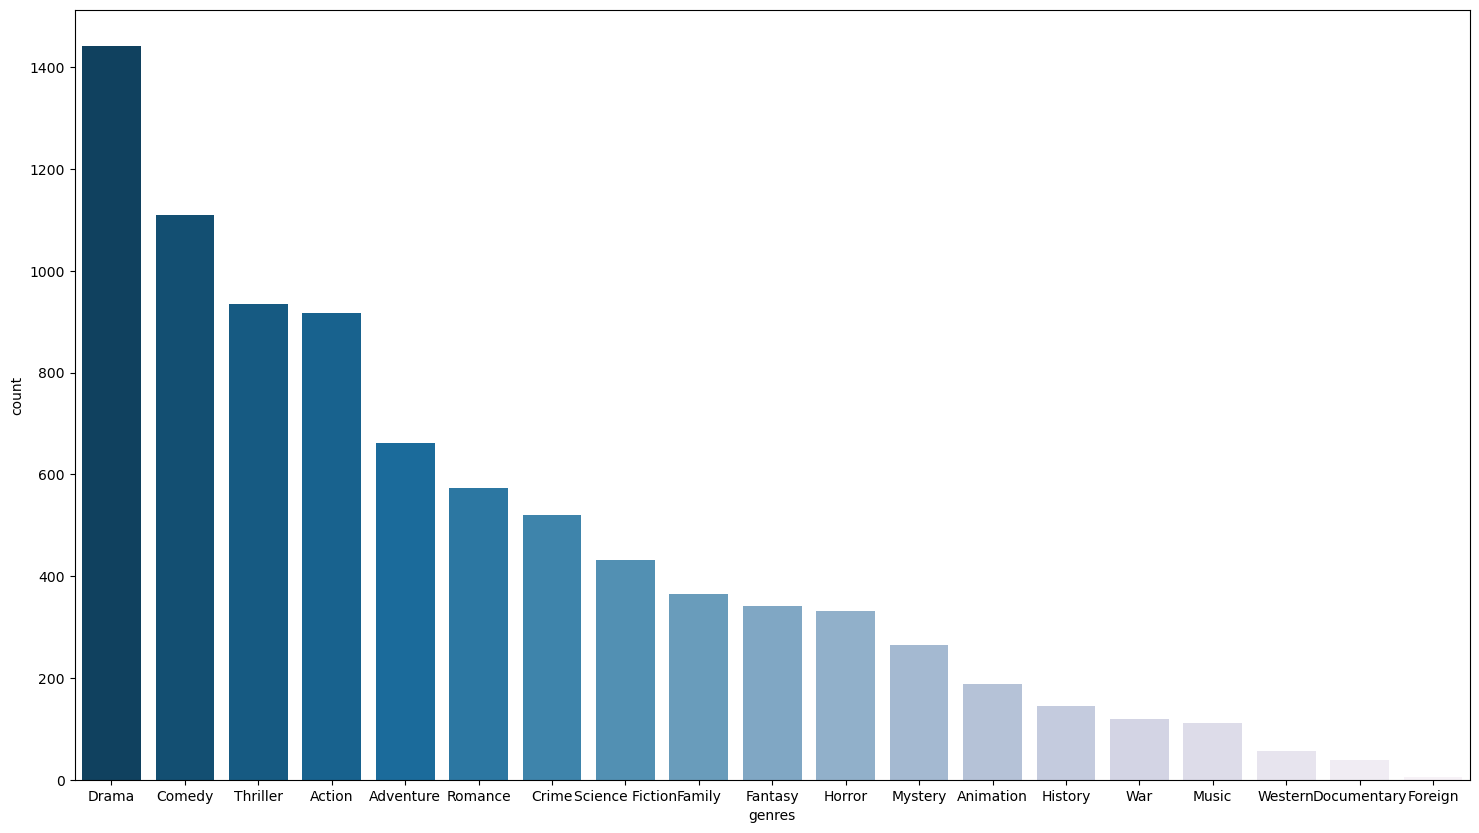

In [218]:
 # Code here
movies_df.genres = movies_df.genres.apply(ast.literal_eval)

plt.figure(figsize=(18, 10))
ax = sns.countplot(
data = movies_df,
x = movies_df.genres.explode(),
order = movies_df.genres.explode().value_counts().index,
palette = "PuBu_r",
)


This graph shows which genres are the most produced. Drama has the most amount of films.

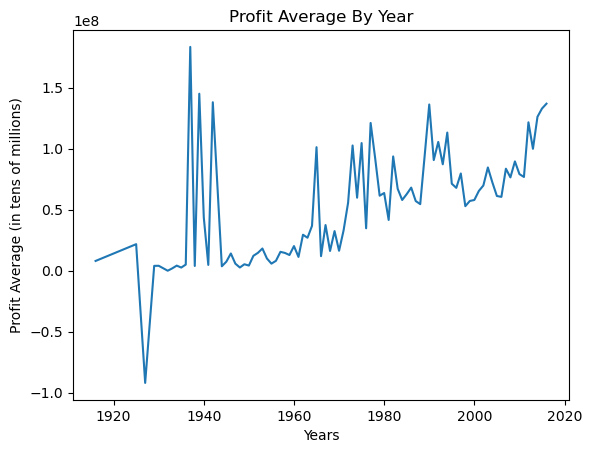

In [221]:
#### Generate three different interesting visualisations with a data story.

### Plot the Average profit by year

profit_year = movies_df.groupby('release_year')['profit'].mean()
plt.plot(profit_year)
plt.title("Profit Average By Year")
plt.xlabel("Years")
plt.ylabel("Profit Average (in tens of millions)");



Overall, the line graph shows profit rising over the decades. From 1920 to 2020, we can see that the average profit has increased over the years.

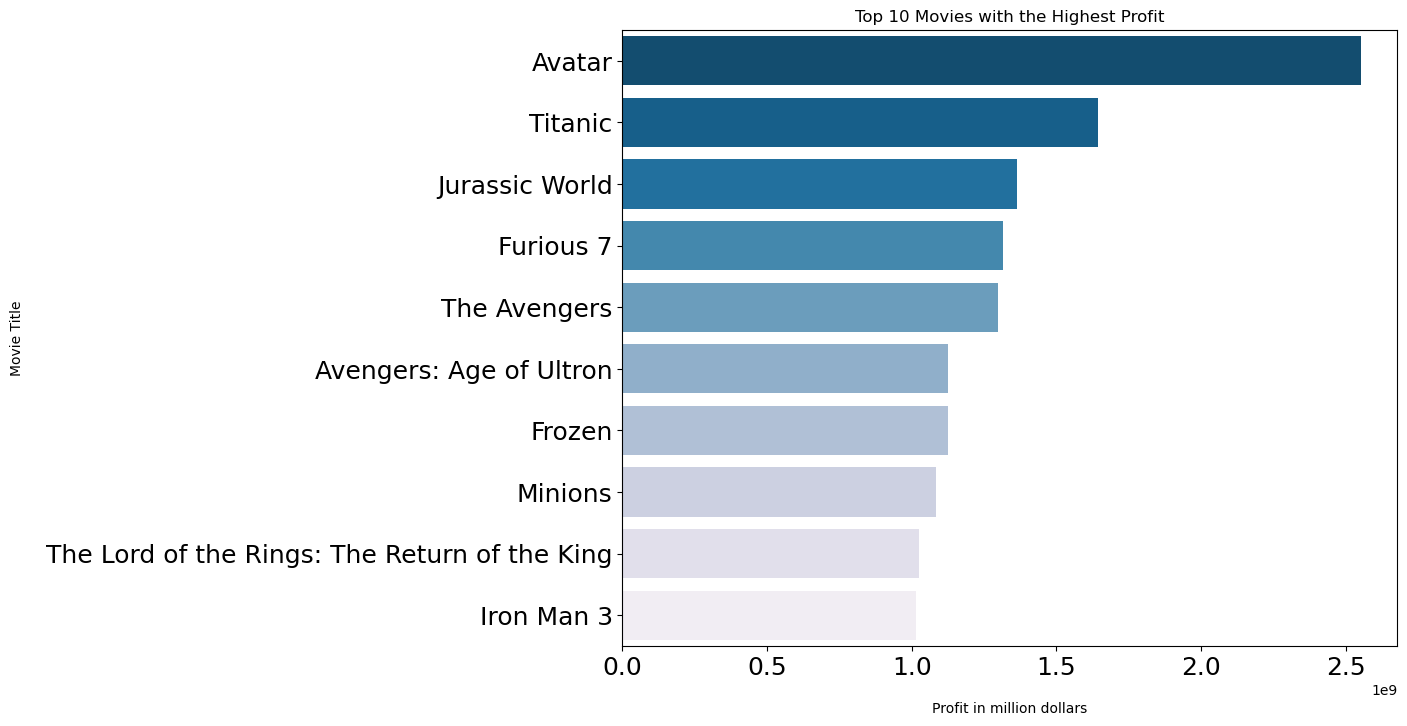

In [191]:
#### Plot the top 10 movies with the highest profit

plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'profit', y = 'title', data = movies_df[movies_df['profit'].notnull()].sort_values(by ='profit', ascending=False).head(10), orient = 'h', palette = "PuBu_r");

plt.title("Top 10 Movies with the Highest Profit");
plt.ylabel('Movie Title', labelpad = 16);
plt.xlabel('Profit in million dollars', labelpad = 16);
ax.tick_params(axis='both', labelsize=18)

Highest profit movie is Avatar which generated over $2.5 B in profit. It is interesting to note that the highest budget and highest profit are not the same. 

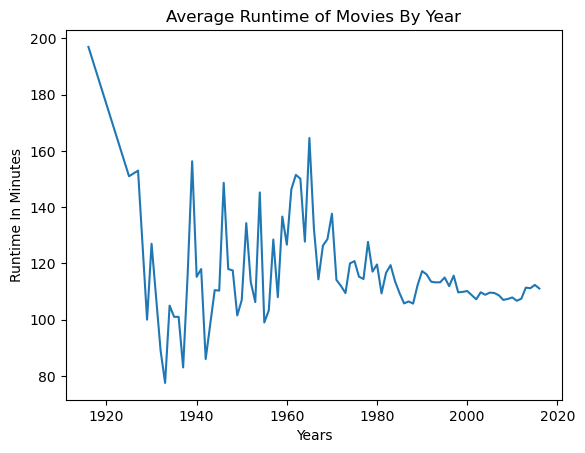

In [202]:
### Plot the average runtime over the years

year_runtime_mean = movies_df.groupby('release_year')['runtime'].mean()
plt.plot(year_runtime_mean)
plt.title("Average Runtime of Movies By Year")
plt.xlabel("Years")
plt.ylabel("Runtime In Minutes");

In [203]:
year_runtime_mean.head(1),year_runtime_mean.tail(1)

(release_year
 1916    197.0
 Name: runtime, dtype: float64,
 release_year
 2016    111.069444
 Name: runtime, dtype: float64)

Over the long term, the average runtime is getting shorter with occasional spikes. The average runtime decreased from about 197 minutes to 111.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)